In [1]:
using StatisticalRethinking
gr(size=(500,500));

Turing.setadbackend(:reverse_diff)

ProjDir = rel_path("..", "chapters", "04")
cd(ProjDir)

### snippet 4.43

In [2]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [3]:
df2 = filter(row -> row[:age] >= 18, df);

Center the weight observations and add a column to df2

In [4]:
mean_weight = mean(df2[:weight])
df2 = hcat(df2, df2[:weight] .- mean_weight)
rename!(df2, :x1 => :weight_c); # Rename our col :x1 => :weight_c

Extract variables for Turing model

In [5]:
y = convert(Vector{Float64}, df2[:height]);
x = convert(Vector{Float64}, df2[:weight_c]);

Define the regression model

In [6]:
@model line(y, x) = begin
    #priors
    alpha ~ Normal(178.0, 100.0)
    beta ~ Normal(0.0, 10.0)
    s ~ Uniform(0, 50)

    #model
    mu = alpha .+ beta*x
    for i in 1:length(y)
      y[i] ~ Normal(mu[i], s)
    end
end;

Disable updating progress of sampling process

In [7]:
Turing.turnprogress(false);

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/Turing.jl:81


Draw the samples

In [8]:
chn = sample(line(y, x), Turing.NUTS(2000, 200, 0.65));

┌ Info: [Turing] looking for good initial eps...
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/samplers/support/hmc_core.jl:246
[NUTS{Turing.FluxTrackerAD,Union{}}] found initial ϵ: 0.1
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/samplers/support/hmc_core.jl:291
┌ Info:  Adapted ϵ = 0.05107535230500457, std = [1.0, 1.0, 1.0]; 200 iterations is used for adaption.
└ @ Turing /Users/rob/.julia/packages/Turing/xp88X/src/samplers/adapt/adapt.jl:91
[NUTS] Finished with
  Running time        = 230.4777333069995;
  #lf / sample        = 0.001;
  #evals / sample     = 19.327;
  pre-cond. metric    = [1.0, 1.0, 1.0].


Describe the chain result

In [9]:
describe(chn)

Iterations = 1:2000
Thinning interval = 1
Chains = 1
Samples per chain = 2000

Empirical Posterior Estimates:
              Mean           SD        Naive SE        MCSE         ESS    
   alpha   153.68085488   9.09028735 0.2032650045  0.9072883247  100.384019
    beta     0.91247533   0.08803280 0.0019684732  0.0066661923  174.394726
  lf_num     0.00100000   0.04472136 0.0010000000  0.0010000000 2000.000000
       s     6.50050937   7.66662133 0.1714308646  1.3912219577   30.367929
 elapsed     0.11523887   0.15434568 0.0034512742  0.0072756484  450.034209
 epsilon     0.06548966   0.14126518 0.0031587854  0.0131324639  115.711839
      lp -1109.86564494 157.19511168 3.5149895545 26.1176679211   36.225074
eval_num    19.32700000  15.55104461 0.3477319287  0.6949385054  500.756255
  lf_eps     0.06548966   0.14126518 0.0031587854  0.0131324639  115.711839

Quantiles:
               2.5%           25.0%           50.0%           75.0%          97.5%    
   alpha   153.915106361   154.

Show corrected results (Drop adaptation samples)

In [10]:
for var in [:alpha, :beta, :s]
  println("$var = ",  mean_and_std(chn[Symbol(var)][1001:2000]))
end

alpha = (154.5882085581703, 0.2587948026381476)
beta = (0.9057089782526612, 0.04230314996953569)
s = (5.105551228340317, 0.20021432917355753)


Compare with a previous result

In [11]:
clip_43s_example_output = "

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
         Mean        SD       Naive SE       MCSE      ESS
alpha 154.597086 0.27326431 0.0043206882 0.0036304132 1000
 beta   0.906380 0.04143488 0.0006551430 0.0006994720 1000
sigma   5.106643 0.19345409 0.0030587777 0.0032035103 1000

Quantiles:
          2.5%       25.0%       50.0%       75.0%       97.5%
alpha 154.0610000 154.4150000 154.5980000 154.7812500 155.1260000
 beta   0.8255494   0.8790695   0.9057435   0.9336445   0.9882981
sigma   4.7524368   4.9683400   5.0994450   5.2353100   5.5090128
";

Example result for Turing with centered weights (appears biased)

In [12]:
clip_43t_example_output = "

[NUTS] Finished with
  Running time        = 163.20725027799972;
  #lf / sample        = 0.006;
  #evals / sample     = 19.824;
  pre-cond. metric    = [1.0, 1.0, 1.0].

                       Mean                              SD
alpha = (154.6020248402468, 0.24090814737592972)
beta   = (0.9040183717679473, 0.0422796486734481)
s        = (5.095714121087817, 0.18455074897377258)

";

Plot the regerssion line and observations

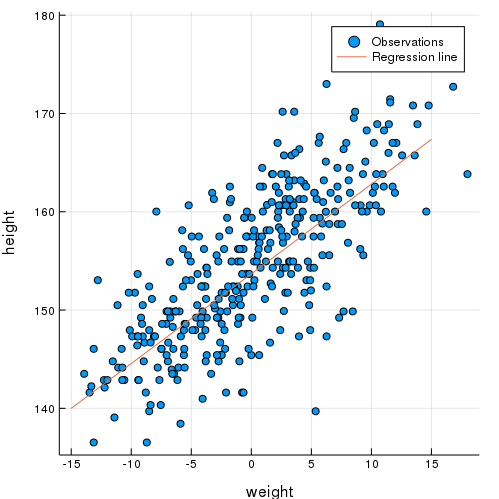

In [13]:
xi = -15.0:0.1:15.0
yi = mean(chn[:alpha]) .+ mean(chn[:beta])*xi

scatter(x, y, lab="Observations", xlab="weight", ylab="height")
plot!(xi, yi, lab="Regression line")

End of `clip_43t.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*